# SVD for Image Compression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

## Image Compression

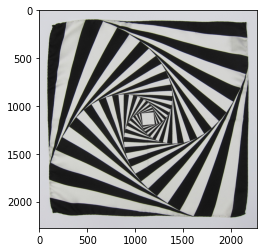

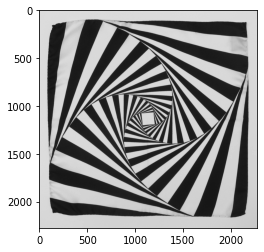

In [ ]:
response = requests.get("https://www.awceramics.co.uk/images/Pocket%20Squares/Op%20Art%20Square%20Swirl%20pocket%20square.jpg") # Image URL
img = Image.open(BytesIO(response.content))
imggray = img.convert('L')
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(imggray, cmap = 'gray')

(2274, 2274)
(2274,)
(2274, 2274)


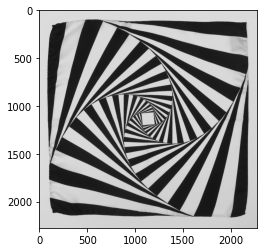

In [ ]:
image = np.array(imggray.getdata()).reshape(imggray.size[1], imggray.size[0])
U, sigma, V = np.linalg.svd(image, full_matrices=False)
print( U.shape )
print( sigma.shape )
print( V.shape)
recon = U @ np.diag(sigma) @ V
plt.figure()
plt.imshow(recon, cmap = 'gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


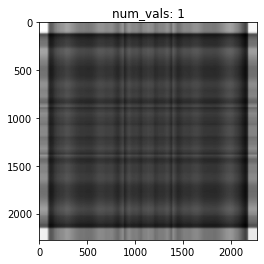

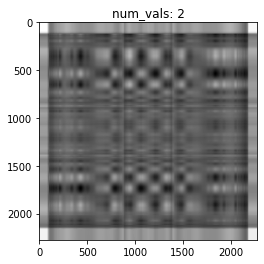

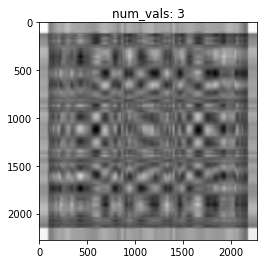

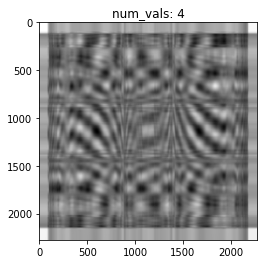

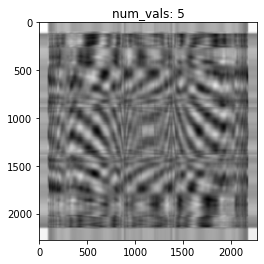

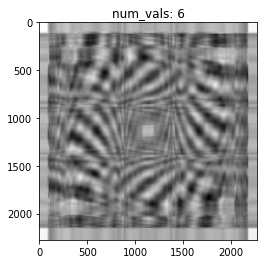

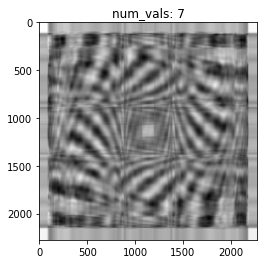

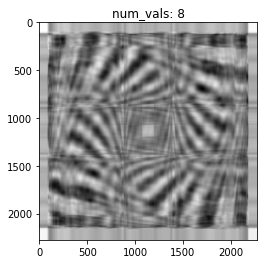

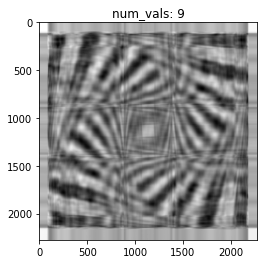

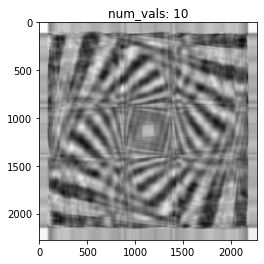

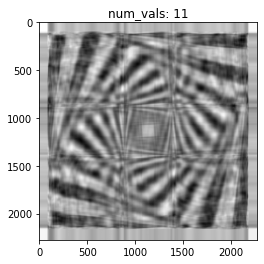

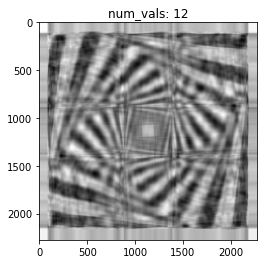

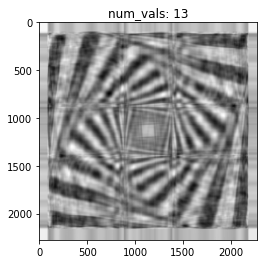

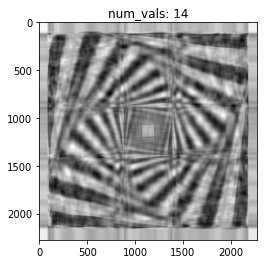

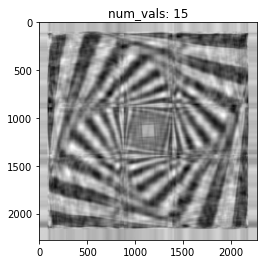

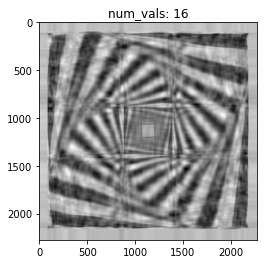

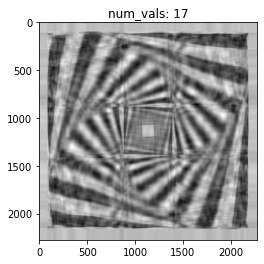

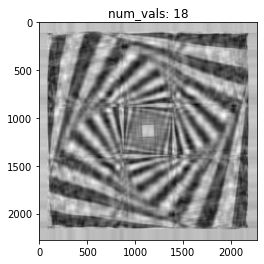

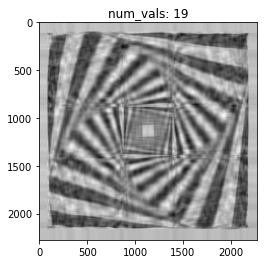

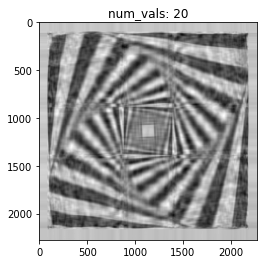

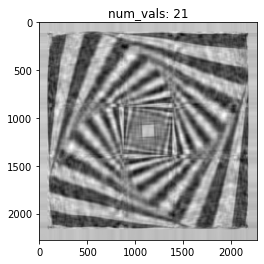

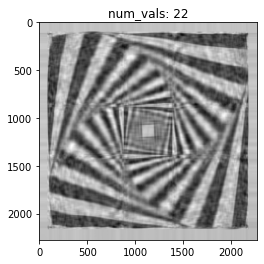

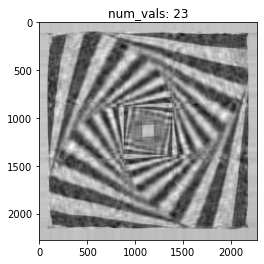

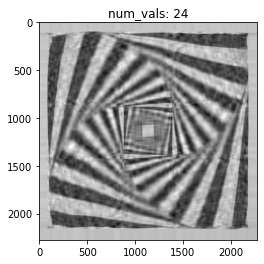

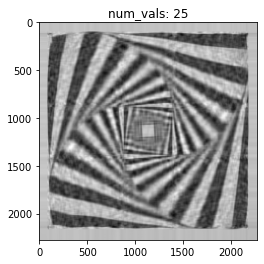

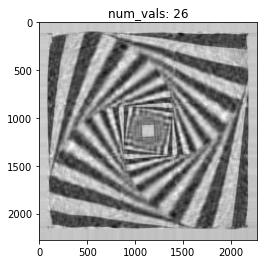

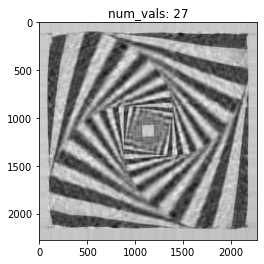

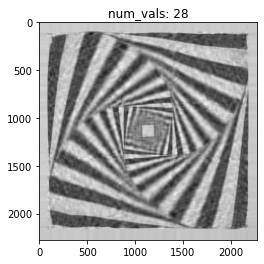

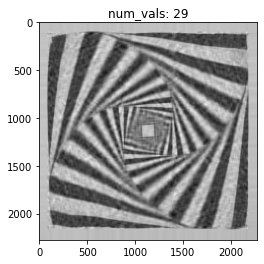

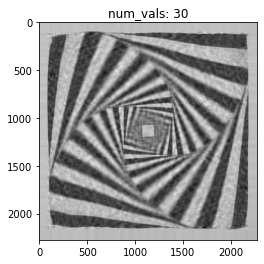

In [ ]:
for n_singular in range(1, 31):
  reconstimg = np.matrix(U[:, :n_singular]) * np.diag(sigma[:n_singular]) * np.matrix(V[:n_singular, :])
  plt.figure()
  plt.title(f'num_vals: {n_singular}')
  plt.imshow(reconstimg, cmap='gray')

## Encrypted Image Example

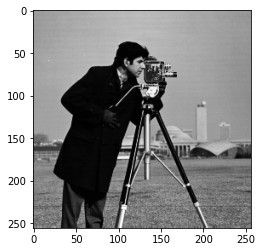

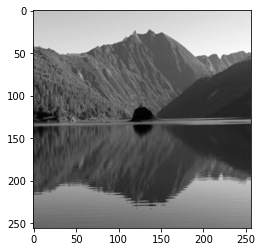

In [ ]:
response = requests.get("https://people.math.sc.edu/Burkardt/data/tif/cameraman.tif")
img = Image.open(BytesIO(response.content))
imggray = img.convert('L')
plt.figure()
plt.imshow(imggray, cmap = 'gray')

response = requests.get("https://negativespace.co/wp-content/uploads/2019/02/negative-space-mountain-lake-water-reflection-944x708.jpg")
img = Image.open(BytesIO(response.content)).resize([256,256])
hidden_i = img.convert('L')
plt.figure()
plt.imshow(hidden_i, cmap = 'gray')

(256, 256)
(256,)
(256, 256)


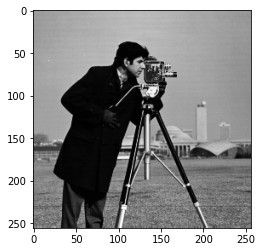

In [ ]:
image = np.array(imggray.getdata()).reshape(imggray.size[1], imggray.size[0])
hidden = np.array(hidden_i.getdata()).reshape(hidden_i.size[1], hidden_i.size[0])
U, sigma, V = np.linalg.svd(image, full_matrices=False)
print( U.shape )
print( sigma.shape )
print( V.shape)
recon = U @ np.diag(sigma) @ V
plt.figure()
plt.imshow(recon, cmap = 'gray')

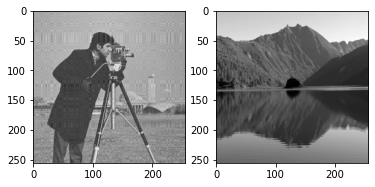

In [ ]:
alpha = 0.1
Encrypted = U @ (np.diag(sigma) + alpha*hidden) @ V
plt.figure()
plt.subplot(1,2,1)
plt.imshow(Encrypted, cmap = 'gray')
plt.subplot(1,2,2)
recon_hidden = (U.T @ Encrypted @ V.T)/alpha - np.diag(sigma)/alpha
plt.imshow(recon_hidden, cmap = 'gray')

## Class Exercise: Coloured Images

(3840, 2160)


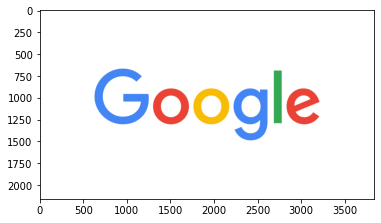

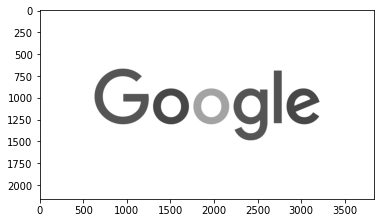

In [ ]:
response = requests.get("https://play-lh.googleusercontent.com/1-hPxafOxdYpYZEOKzNIkSP43HXCNftVJVttoo4ucl7rsMASXW3Xr6GlXURCubE1tA=w3840-h2160-rw") # Image URL
img = Image.open(BytesIO(response.content))
imggray = img.convert('L')
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(imggray, cmap = 'gray')
print(img.size)

### DO with Class

# Gradient Descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## function to Visualize GD

In [ ]:
def plot_descent(lr, iters, func, grad, X):
  y_poly = func(X)

  x_path = np.zeros(iters,)
      
  x_path[0] = x_start
  for i in range (1,iters):
      derivative =grad(x_path[i-1])
      x_path[i] = x_path[i-1]-(derivative*lr)
  x_path
  plt.plot(X,y_poly)
  plt.plot(x_path, function(x_path),'-o')


## Simple Polynomial

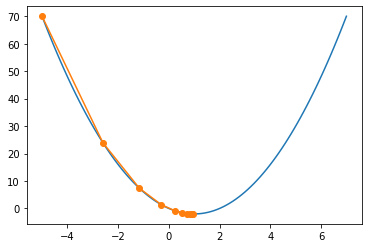

In [ ]:
# Defining Limits
x_start = -5
x_end = 7
x_poly = np.linspace(x_start, x_end, 100)


# Defining Cost Function
def function(X):
    return 2*X**2-4*X

# Defining Gradient Function
def gradient(X):
    return  (4*X) -4

plot_descent(0.1, 10, function, gradient, x_poly)

## Sine Function

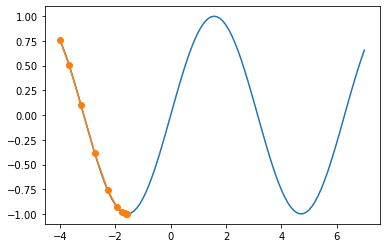

In [ ]:
# Defining Limits
x_start = -4
x_end = 7
x_poly = np.linspace(x_start, x_end, 100)


# Defining Cost Function
def function(X):
    return np.sin(X)

# Defining Gradient Function
def gradient(X):
    return  np.cos(X)

plot_descent(0.5, 10, function, gradient, x_poly)

##Polynomial Regression Task

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import requests
from io import BytesIO

## Ref: https://www.geeksforgeeks.org/implementation-of-logistic-regression-from-scratch-using-python/

# Logistic Regression
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape    
            
        # weight initialization        
        self.W = np.zeros(self.n)        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1/(1+np.exp(-1*((self.X).dot(self.W)+self.b)))  

        # calculate gradients        
        tmp = (A - self.Y)         
        dW = np.dot(self.X.T,tmp) /self.m         
        db = #### TO-DO  
          
        # update weights    
        self.W = self.W-dW*self.learning_rate   
        self.b = self.b-db*self.learning_rate  
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
        Z = np.exp(-1*((self.X).dot(self.W)+self.b)))
        Z = 1/(1+Z)  
        Y = np.where(G>8.5)          
        return Y
  
      
# Importing dataset : https://www.kaggle.com/code/harrywang/housing-price-prediction/data?select=housing.csv

df = pd.read_csv('housing.csv')
X = df.iloc[:,:-1].values
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
X = np.delete(X, 4, 1)

Y_t = df.iloc[:,-1].values
Y = np.where( Y_t == Y_t[0], 1, 0 ) 

Y = Y[~np.isnan(X).any(axis=1)]
X = X[~np.isnan(X).any(axis=1)]
  
# Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(
  X, Y, test_size = 0.3, random_state = 42 )
  
# Model training    
model = LogitRegression( learning_rate = 0.1, iterations = 100 )
  
model.fit( X_train, Y_train )
  
# Prediction on test set
Y_pred = model.predict( X_test ) 
  
# measure performance    
correctly_classified = 0    
  
# counter    
count = 0    
for count in range( Y_pred.shape[0] ) :  
    
    if Y_test[count] == Y_pred[count] :            
        correctly_classified = correctly_classified + 1  
      
print( "Accuracy on test set by our model       :  ", ( correctly_classified / count ) * 100 )

SyntaxError: ignored